<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/Richard/introduction_to_error_reduction_techniques_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Error Reduction Techniques

Author: Richard Harry

Date Created: September 20th, 2023

Last Modified: September 24th, 2023



This two-module notebook consists of an introduction to sampling, interpreting, and optimizing machine learning models using mean absolute percent error (MAPE), mean standard error (MSE), and error-correcting output codes (ECOC).  This notebook can be seen as a continuation of DSECOP 150: Introduction to Classification Algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
import io
from google.colab import files


In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving glassdata.csv to glassdata.csv
User uploaded file "glassdata.csv" with length 10827 bytes


In [6]:
df = pd.read_csv(io.StringIO(uploaded['glassdata.csv'].decode('utf-8')))
df = df[['ID', 'refractive_index','Na', 'Mg', 'Al', 'Si','K','Ca','Ba','Fe','glass_type']]

df.head()

,ID,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Note: Element variables are unit measurements for weight percent in corresponding oxide

In [8]:
glassdata = pd.read_csv("glassdata.csv")

In [48]:
glassdata.head

<bound method NDFrame.head of       ID  refractive_index     Na    Mg    Al     Si     K    Ca    Ba   Fe  \
0      1           1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   
1      2           1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   
2      3           1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   
3      4           1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   
4      5           1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   
..   ...               ...    ...   ...   ...    ...   ...   ...   ...  ...   
209  210           1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   
210  211           1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   
211  212           1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   
212  213           1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   
213  214           1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   

     glass_type  
0  

In [9]:
feature_cols = ['Na', 'Mg', 'Al', 'Si','K','Ca','Ba','Fe']
X = glassdata[feature_cols] # Features
y = glassdata.refractive_index

Types of Glass: Class Attributes

1 - Buiding Windows, float processed

2 - Building Windows, non float processed

3 - Vehicle Windows, float processed

4 - Vehicle Windows, non float processed

5 - Containers

6 - Tableware

7 - Headlamps

<Axes: xlabel='glass_type', ylabel='refractive_index'>

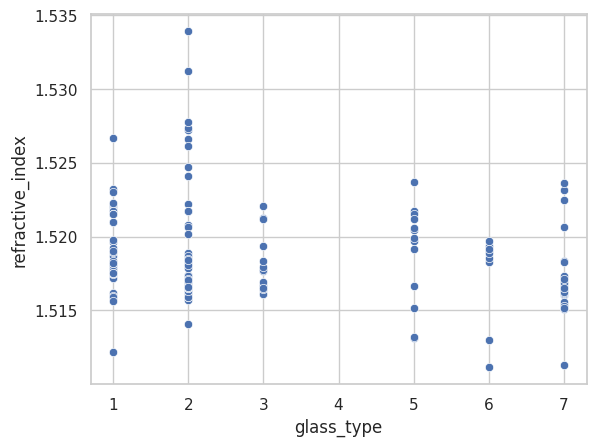

In [10]:
sns.scatterplot(x='glass_type',
                y='refractive_index', data=df)

In [11]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)

In [15]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1.5455114085165156e-06
mean_absolute_error :  0.0007630969396139156


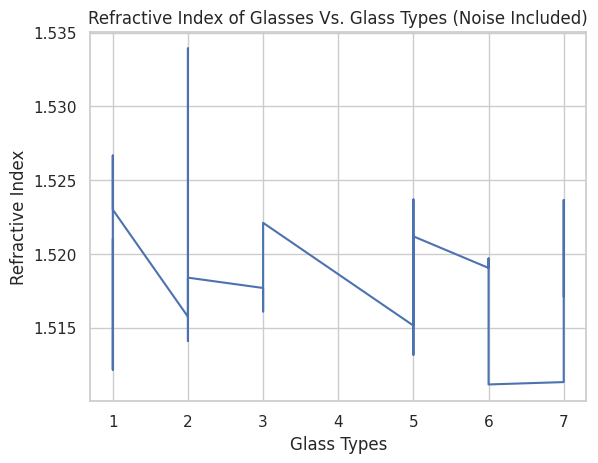

In [16]:
plt.plot(glassdata.glass_type,y)
plt.title('Refractive Index of Glasses Vs. Glass Types (Noise Included)')
plt.xlabel('Glass Types')
plt.ylabel('Refractive Index')
plt.show()

ValueError: ignored

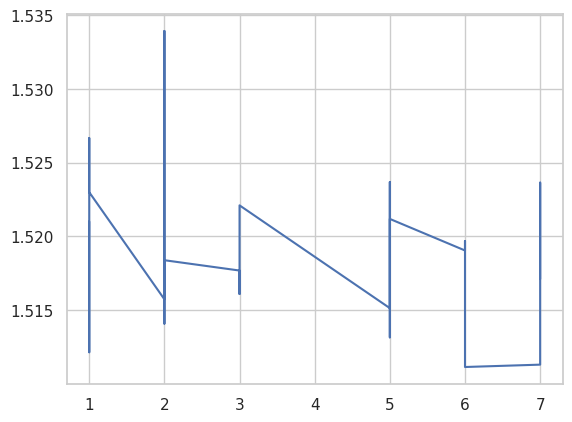

In [21]:
plt.plot(glassdata.glass_type,y)
plt.plot(glassdata.glass_type, y_test)
plt.title('Refractive Index of Glasses Vs. Glass Types (Noise and Prediction)')
plt.xlabel('Glass Type')
plt.ylabel('Refractive Index')
plt.legend(['y','y_train'])
plt.show()